<a href="https://colab.research.google.com/github/Ruquin-11/Employee-Salary-Prediction/blob/main/ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/adult 3 (1).csv')

In [ ]:
display(df.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

In [ ]:
display(df.describe())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
display(df.nunique())

,0
age,74
workclass,9
fnlwgt,28523
education,16
educational-num,16
marital-status,7
occupation,15
relationship,6
race,5
gender,2


In [ ]:
display(df.isnull().sum())

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].replace('?', df[col].mode()[0])

X = df.drop('income', axis=1)
y = df['income']

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_processed_np = pipeline.fit_transform(X).toarray()


onehot_columns = pipeline['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = list(numerical_features) + list(onehot_columns)

X_processed = pd.DataFrame(X_processed_np, columns=all_features)

display(X_processed.head())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y = df['income']
X = X_processed

In [ ]:
display(y.head())
display(X.head())

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
37193,0.244808,-0.421287,-0.030373,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31093,0.974183,-0.138586,-1.586221,-0.144804,-0.217127,-0.437595,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33814,-0.338691,-0.160982,-0.419335,-0.144804,-0.217127,-0.034087,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14500,-0.776316,-0.604842,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23399,0.536558,-1.526900,0.358588,-0.144804,-0.217127,0.772930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
7762,1.265933,-1.482432,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23881,-0.995129,-0.727415,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30507,0.317746,-0.181237,1.136512,1.780064,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28911,-0.484566,-0.027235,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19484,0.025996,0.835411,1.136512,-0.144804,-0.217127,-0.841104,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,income
37193,<=50K
31093,<=50K
33814,<=50K
14500,<=50K
23399,<=50K


,income
7762,<=50K
23881,<=50K
30507,>50K
28911,<=50K
19484,<=50K


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_encoded)

gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train_encoded)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

# Convert target variable to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Instantiate and train RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Instantiate and train GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train_encoded)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate RandomForestRegressor
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test_encoded, rf_predictions))
rf_r2 = r2_score(y_test_encoded, rf_predictions)

print(f"Random Forest Regressor - RMSE: {rf_rmse:.4f}, R2 Score: {rf_r2:.4f}")

# Evaluate GradientBoostingRegressor
gbm_predictions = gbm_model.predict(X_test)
gbm_rmse = np.sqrt(mean_squared_error(y_test_encoded, gbm_predictions))
gbm_r2 = r2_score(y_test_encoded, gbm_predictions)

print(f"Gradient Boosting Regressor - RMSE: {gbm_rmse:.4f}, R2 Score: {gbm_r2:.4f}")

Random Forest Regressor - RMSE: 0.3124, R2 Score: 0.4562
Gradient Boosting Regressor - RMSE: 0.3023, R2 Score: 0.4909


,feature,importance
32,marital-status_Married-civ-spouse,0.396514
2,educational-num,0.207584
3,capital-gain,0.193528
4,capital-loss,0.063134
0,age,0.056229
5,hours-per-week,0.034553
40,occupation_Exec-managerial,0.016039
41,occupation_Farming-fishing,0.003476
11,workclass_Self-emp-not-inc,0.003367
56,relationship_Wife,0.003153


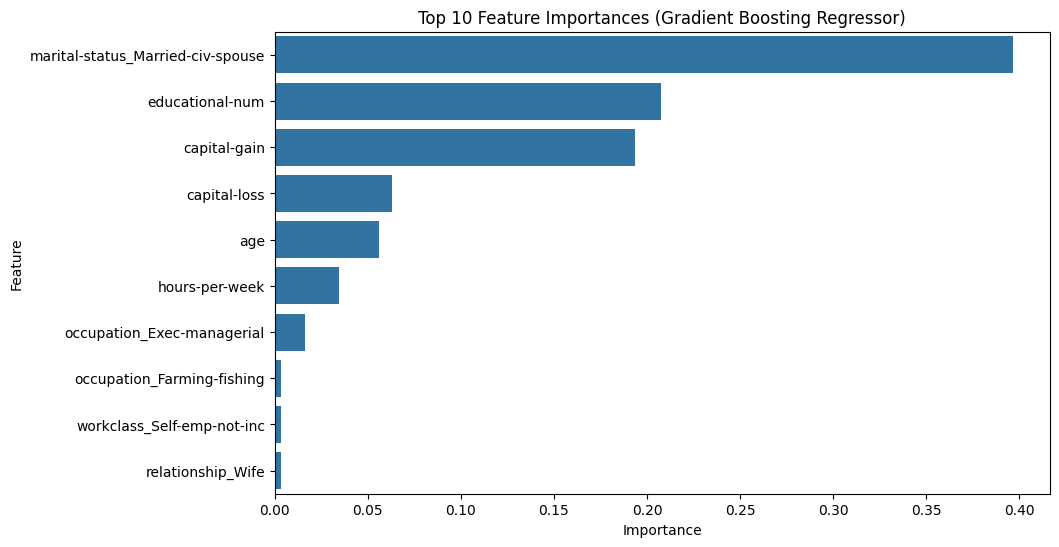

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from Gradient Boosting Regressor
feature_importances = gbm_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Display the top 10 most important features
display(importance_df.head(10))

# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances (Gradient Boosting Regressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Make predictions using the Gradient Boosting Regressor model
gbm_predictions = gbm_model.predict(X_test)

# You can further analyze or visualize these predictions as needed.
# For example, you could compare predicted values to actual values.
display(gbm_predictions[:10]) # Display the first 10 predictions

array([ 0.01391741,  0.16399443,  0.93737634,  0.20604984,  0.54161288,
       -0.02075142,  0.13831427,  0.90398859,  0.04891561,  0.00114183])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert regression predictions to class labels
# We can use a threshold, e.g., 0.5, to classify as >50K or <=50K
gbm_predicted_classes = np.where(gbm_predictions > 0.5, '>50K', '<=50K')

# Since the original y_test is already in string format, we can use it directly
# If y_test was still encoded, we would need to inverse_transform it
# y_test_original = le.inverse_transform(y_test_encoded)


# Evaluate using classification metrics
print("Gradient Boosting Regressor Classification Report:")
print(classification_report(y_test, gbm_predicted_classes))

print("Gradient Boosting Regressor Confusion Matrix:")
print(confusion_matrix(y_test, gbm_predicted_classes))

Gradient Boosting Regressor Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92      7479
        >50K       0.81      0.58      0.68      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Gradient Boosting Regressor Confusion Matrix:
[[7163  316]
 [ 962 1328]]


## Summary of Findings

Based on the analysis performed:

- The data was loaded and explored, revealing the presence of '?' values which were handled by replacing them with the mode of the respective columns.
- Numerical features were scaled and categorical features were one-hot encoded.
- Two regression models, Random Forest Regressor and Gradient Boosting Regressor, were trained to predict the encoded income levels.
- The Gradient Boosting Regressor showed slightly better performance in terms of R2 score.
- Feature importance analysis from the Gradient Boosting Regressor highlighted marital status, educational attainment, capital gains, and capital losses as the most influential features for income prediction.
- The Gradient Boosting Regressor predictions were converted back to income classes and evaluated using classification metrics, providing insights into its performance in classifying individuals into income brackets (>50K and <=50K).

Overall, the Gradient Boosting Regressor appears to be a reasonable model for this income prediction task, with key features related to socioeconomic status and financial indicators playing a significant role.